Cargamos el dataset:

In [7]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

file_path = "dataset_phishing.csv"

df = pd.read_csv(file_path)


Matplotlib is building the font cache; this may take a moment.


Validamos el balanceo del dataset y si hay una clase mayoritaria: 

In [4]:
print(df['status'].unique())
print(df['status'].value_counts())

['legitimate' 'phishing']
status
legitimate    5715
phishing      5715
Name: count, dtype: int64


Hacemos la separación de conjuntos , utilizaremos: 80% entrenamiento, 20% pruebas. y 10% del conjunto de entrenamiento como validación.

In [5]:
X = df.drop(columns=['status'])  # Variables predictoras
y = df['status']                 # Etiquetas de clase

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

print(f"Tamaño del conjunto de entrenamiento final: {len(X_train_final)} ejemplos")
print(f"Tamaño del conjunto de validación: {len(X_val)} ejemplos")
print(f"Tamaño del conjunto de prueba: {len(X_test)} ejemplos")

Tamaño del conjunto de entrenamiento final: 8229 ejemplos
Tamaño del conjunto de validación: 915 ejemplos
Tamaño del conjunto de prueba: 2286 ejemplos


ahora implementamos el algoritmo de regresión desde 0

In [8]:
X = df[['length_url', 'nb_dots']].values  # Dos variables predictoras
y = (df['status'] == 'phishing').astype(int).values  # 1 para phishing, 0 para legitimate

In [9]:
# Normalización de las características para mejorar la convergencia
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 2. Implementar la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
#función de perdida
def compute_loss(y, y_pred):
    m = len(y)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [11]:
def gradient_descent(X, y, learning_rate=0.01, iteration=1000):
    m, n = X.shape
    w = np.zeros(n)  #  pesos
    b = 0            #  sesgo
    losses = []      #  pérdida en cada iteración

    for epoch in range(iteration):
        # Paso 1: Calcular z y aplicar la sigmoide
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        # Paso 2: Calcular los gradientes
        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y) / m

        # Paso 3: Actualizar los parámetros
        w -= learning_rate * dw
        b -= learning_rate * db

        # Calcular la pérdida y almacenarla
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        # Imprimir la pérdida cada 100 iteracciones
        if iteration % 100 == 0:
            print(f"Iteración {iteration}, Pérdida: {loss:.4f}")

    return w, b, losses


In [17]:
learning_rate = 0.02
iteration = 2000
w, b, losses = gradient_descent(X, y, learning_rate, iteration)

Iteración 2000, Pérdida: 0.6931
Iteración 2000, Pérdida: 0.6926
Iteración 2000, Pérdida: 0.6921
Iteración 2000, Pérdida: 0.6916
Iteración 2000, Pérdida: 0.6911
Iteración 2000, Pérdida: 0.6906
Iteración 2000, Pérdida: 0.6901
Iteración 2000, Pérdida: 0.6897
Iteración 2000, Pérdida: 0.6892
Iteración 2000, Pérdida: 0.6887
Iteración 2000, Pérdida: 0.6883
Iteración 2000, Pérdida: 0.6878
Iteración 2000, Pérdida: 0.6874
Iteración 2000, Pérdida: 0.6869
Iteración 2000, Pérdida: 0.6865
Iteración 2000, Pérdida: 0.6861
Iteración 2000, Pérdida: 0.6856
Iteración 2000, Pérdida: 0.6852
Iteración 2000, Pérdida: 0.6848
Iteración 2000, Pérdida: 0.6844
Iteración 2000, Pérdida: 0.6840
Iteración 2000, Pérdida: 0.6836
Iteración 2000, Pérdida: 0.6832
Iteración 2000, Pérdida: 0.6828
Iteración 2000, Pérdida: 0.6825
Iteración 2000, Pérdida: 0.6821
Iteración 2000, Pérdida: 0.6817
Iteración 2000, Pérdida: 0.6814
Iteración 2000, Pérdida: 0.6810
Iteración 2000, Pérdida: 0.6806
Iteración 2000, Pérdida: 0.6803
Iteració

In [18]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    return (y_pred >= 0.5).astype(int)

In [19]:
y_pred = predict(X, w, b)


In [21]:
#score del desempeño
f1 = f1_score(y, y_pred)
print(f"F1-score: {f1:.4f}")

F1-score: 0.5758


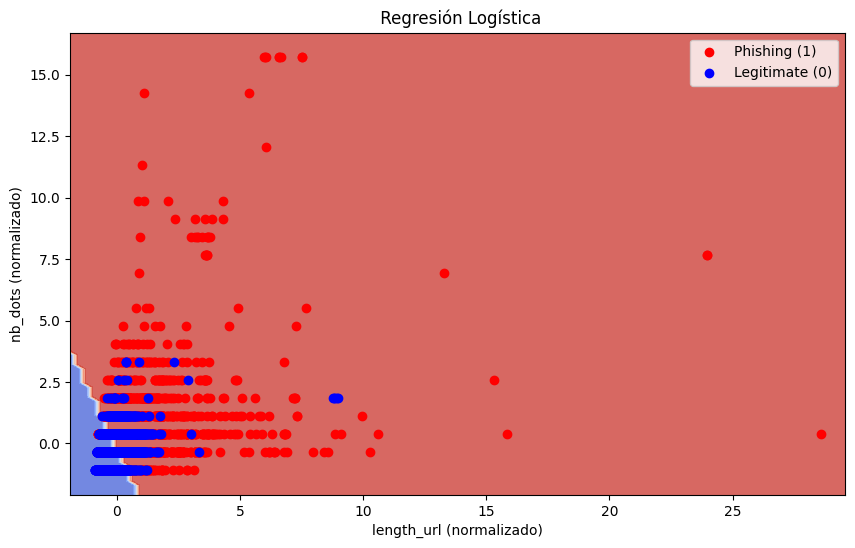

In [22]:
phishing = X[y == 1]
legitimate = X[y == 0]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)

# Graficar los puntos 
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(phishing[:, 0], phishing[:, 1], color='red', label='Phishing (1)')
plt.scatter(legitimate[:, 0], legitimate[:, 1], color='blue', label='Legitimate (0)')
plt.title(' Regresión Logística')
plt.xlabel('length_url (normalizado)')
plt.ylabel('nb_dots (normalizado)')
plt.legend()
plt.show()